In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from preprocesamiento_pedidos import crear_df as crear_df_pedidos
from preprocesamiento_muestras import crear_df as crear_df_muestras
from preprocesamiento_visitas import crear_df as crear_df_visitas



In [26]:
rutas_coordenadas = {
        'CALI': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_CALI.csv",
        'MEDELLIN': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_MEDELLIN.csv",
        'MANIZALES': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_MANIZALES.csv",
        'PEREIRA': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_PEREIRA.csv",
        'BOGOTA': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_BOGOTA.csv",
        'BARRANQUILLA': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_BARRANQUILLA.csv",
        'BUCARAMANGA': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_BUCARAMANGA.csv"
    }
centroope = 2
fecha_inicio = "2024-11-01" 
fecha_fin = "2024-12-01"
ruta_coordenadas = rutas_coordenadas['CALI']

data = crear_df_muestras(centroope, fecha_inicio, fecha_fin, ruta_coordenadas)
data.columns

c:\Users\hp\OneDrive - GRUPO EMPRESARIAL DE LA LIMPIEZA SA\Documentos\GitHub\MAPAS_STREAMLIT\pre_procesamiento\preprocesamiento_muestras.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion)


         fecha_evento coordenada_longitud  ... ruta_cobro   nom_ruta
0 2024-11-01 11:33:28         -76.4978515  ...          8  ORIENTE 3
1 2024-11-01 11:57:31         -76.4977272  ...          7  ORIENTE 3
2 2024-11-01 12:15:54         -76.4978039  ...          7  ORIENTE 3
3 2024-11-01 12:35:57  -76.49802166666667  ...          7  ORIENTE 3
4 2024-11-01 12:39:10  -76.49807333333334  ...          8  ORIENTE 3

[5 rows x 10 columns]


Index(['fecha_evento', 'coordenada_longitud', 'coordenada_latitud',
       'id_barrio', 'barrio', 'id_estrato', 'latitud', 'longitud',
       'ruta_cobro', 'nom_ruta'],
      dtype='object')

In [25]:
data

,fecha_evento,coordenada_longitud,coordenada_latitud,id_barrio,barrio,id_estrato,latitud,longitud,ruta_cobro,nom_ruta
0,2024-11-01 07:51:47,-76.5074294,3.4836474,1022,BRISAS DE LOS ALAMOS,3.0,3.493039,-76.502709,6,NORTE
1,2024-11-01 08:42:59,-76.4942613,3.5306759,1120,OASIS DE COMFANDI,3.0,3.488092,-76.496319,5,NORTE
2,2024-11-01 08:45:22,-76.4942611,3.530688,1315,CAMPIÑA,4.0,3.482999,-76.525745,3,NORORIENTE
3,2024-11-01 08:48:16,-76.4942507,3.5306778,1271,BELLAVISTA,2.0,3.445463,-76.542599,11,CENTRO-OESTE 1
4,2024-11-01 08:55:36,-76.4942386,3.5306959,1211,LA HACIENDA,5.0,3.398538,-76.531519,10,SUR
...,...,...,...,...,...,...,...,...,...,...
12532,2024-11-30 19:21:32,-76.4734593,3.4309859,1014,LOS ALAMOS,4.0,3.485730,-76.506610,5,NORORIENTE
12533,2024-11-30 19:26:00,-76.521815,3.48603,1087,LA FLORA,5.0,3.488269,-76.515161,3,NORORIENTE
12534,2024-11-30 19:41:59,-76.48077113333333,3.4341834500000004,1313,ALIANZA,3.0,3.469472,-76.506673,13,NORORIENTE
12535,2024-11-30 19:53:06,-76.2853602,3.5413085,46253,OLIMPICO,1.0,3.524613,-76.306781,16 PALMIRA,PALMIRA


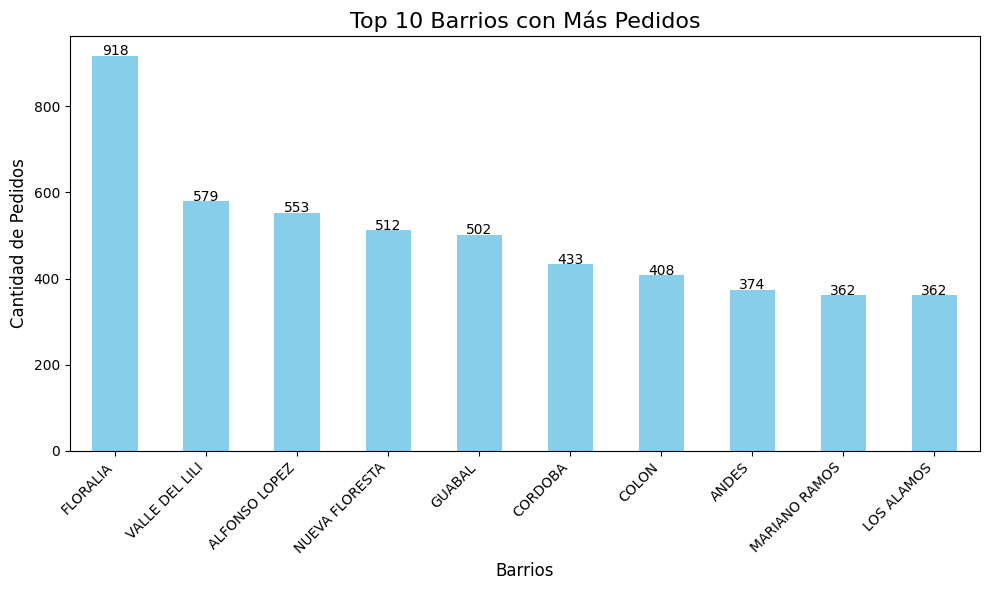

In [38]:

# Calcular los Top 10 barrios con más pedidos
top_barrios = data['barrio'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_barrios.plot(kind='bar', color='skyblue')
plt.title('Top 10 Barrios con Más Pedidos', fontsize=16)
plt.xlabel('Barrios', fontsize=12)
plt.ylabel('Cantidad de Pedidos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, value in enumerate(top_barrios):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


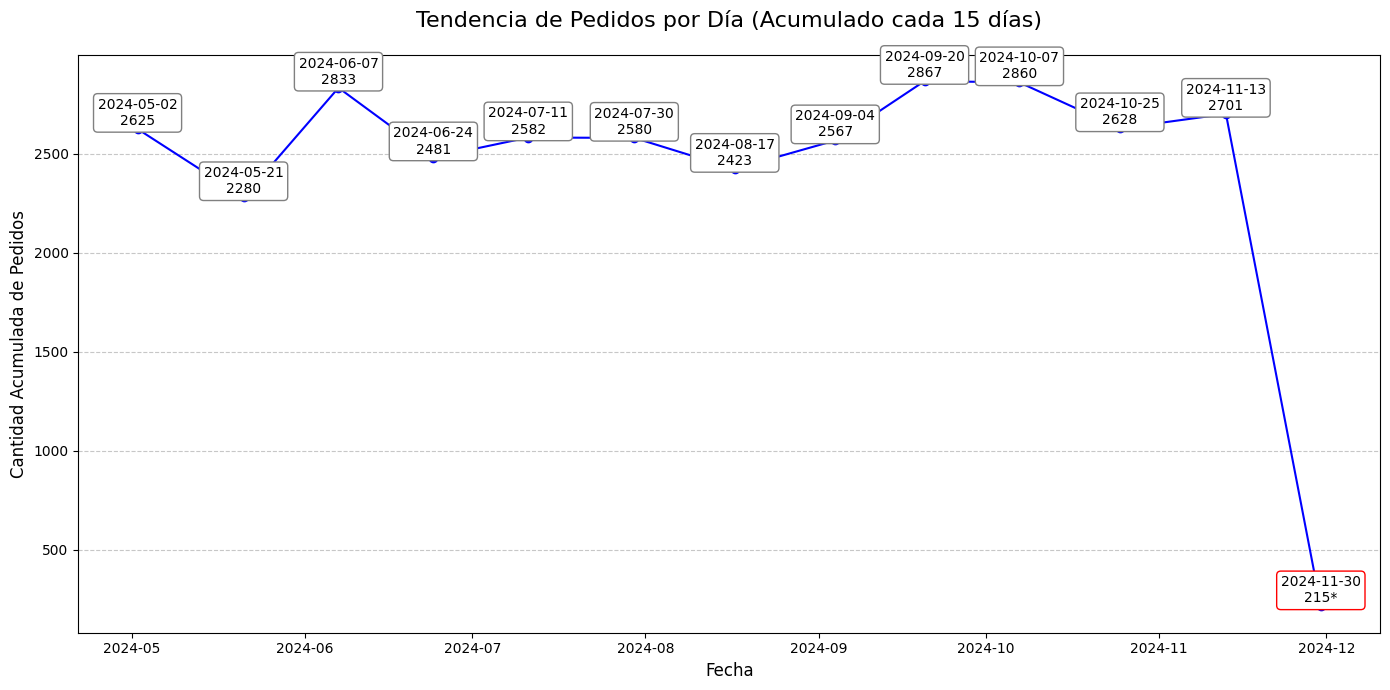

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna de fecha_hora_entrega a formato datetime
data['fecha_hora_entrega'] = pd.to_datetime(data['fecha_hora_entrega'])
data['fecha'] = data['fecha_hora_entrega'].dt.date

# Agrupar por día
pedidos_por_dia = data.groupby('fecha').size()

# Filtrar días con pedidos mayores a 5
pedidos_por_dia = pedidos_por_dia[pedidos_por_dia > 5]

# Determinar el rango de fechas
fecha_min = pedidos_por_dia.index.min()
fecha_max = pedidos_por_dia.index.max()
dias_totales = (fecha_max - fecha_min).days

# Ajustar el intervalo de agrupación según el rango de fechas
if dias_totales <= 30:
    intervalo = 2  # Cada 2 días
elif dias_totales <= 180:
    intervalo = 7  # Cada 7 días
elif dias_totales <= 365:
    intervalo = 15  # Cada 15 días
else:
    intervalo = 30  # Cada 30 días

# Crear un DataFrame temporal para agrupar los datos por intervalo
df_temp = pedidos_por_dia.reset_index()
df_temp.columns = ['fecha', 'cantidad']
df_temp['grupo'] = df_temp.index // intervalo  # Crear grupos por intervalo
pedidos_acumulados = df_temp.groupby('grupo').agg({'fecha': 'min', 'cantidad': 'sum'})

# Identificar si el último grupo está incompleto
ultimo_grupo_incompleto = len(df_temp) % intervalo != 0

# Crear el gráfico de líneas con valores acumulados
plt.figure(figsize=(14, 7))
plt.plot(pedidos_acumulados['fecha'], pedidos_acumulados['cantidad'], marker='o', color='blue')

# Anotar los valores acumulados en el gráfico
for i, (fecha, cantidad) in enumerate(zip(pedidos_acumulados['fecha'], pedidos_acumulados['cantidad'])):
    if i == len(pedidos_acumulados) - 1 and ultimo_grupo_incompleto:  # Si es el último grupo incompleto
        plt.text(fecha, cantidad + 5, f"{fecha}\n{cantidad}*", fontsize=10, ha='center', va='bottom',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white"))
    else:
        plt.text(fecha, cantidad + 5, f"{fecha}\n{cantidad}", fontsize=10, ha='center', va='bottom',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white"))

# Ajustar el título con margen y el intervalo dinámico
plt.title(f'Tendencia de Pedidos por Día (Acumulado cada {intervalo} días)', fontsize=16, pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad Acumulada de Pedidos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

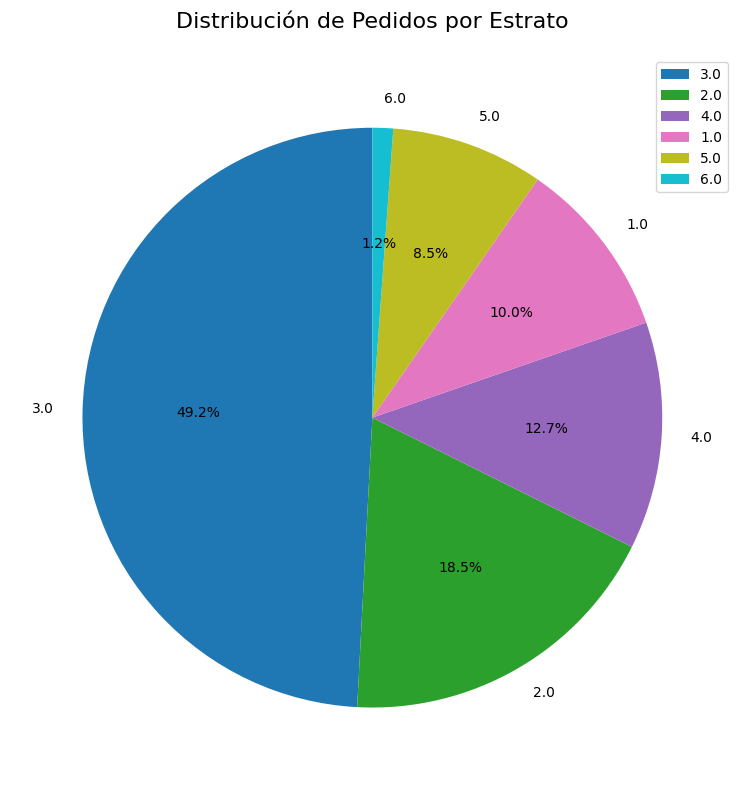

In [41]:
# Filtrar los datos para excluir estrato 0
pedidos_por_estrato = data['id_estrato'].value_counts()
pedidos_por_estrato = pedidos_por_estrato[pedidos_por_estrato.index != 0]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
pedidos_por_estrato.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%' if p > 1 else '',  # Mostrar valores pequeños solo si son mayores al 1%
    startangle=90,
    cmap='tab10',
    legend=True
)
plt.title('Distribución de Pedidos por Estrato', fontsize=16, pad=20)
plt.ylabel('')  # Eliminar etiqueta del eje Y para gráficos de pastel
plt.tight_layout()
plt.show()


In [8]:
# Agrupar por día
pedidos_por_dia = data.groupby('fecha').size()
# Asegurarnos de que el índice de pedidos_por_dia sea un DatetimeIndex
pedidos_por_dia.index = pd.to_datetime(pedidos_por_dia.index)

# Calcular el total de pedidos en el período
total_pedidos = data.shape[0]

# Calcular el promedio diario de pedidos
promedio_diario = pedidos_por_dia.mean()

# Calcular crecimiento vs período anterior
# Últimos 30 días y los 30 días anteriores
periodo_actual = pedidos_por_dia.loc[pedidos_por_dia.index[-30:]].sum()  # Últimos 30 días
periodo_anterior = pedidos_por_dia.loc[pedidos_por_dia.index[-60:-30]].sum()  # Penúltimos 30 días
crecimiento = ((periodo_actual - periodo_anterior) / periodo_anterior * 100) if periodo_anterior > 0 else None

# Crear un resumen visual de los KPIs
fig, ax = plt.subplots(figsize=(8, 5))
kpi_labels = ['Total Pedidos', 'Promedio Diario', 'Crecimiento (%)']
kpi_values = [total_pedidos, promedio_diario, crecimiento if crecimiento is not None else 0]
colors = ['skyblue', 'orange', 'lightgreen']

bars = ax.bar(kpi_labels, kpi_values, color=colors)
ax.set_title('KPIs de Pedidos', fontsize=16, pad=20)

# Añadir etiquetas en las barras
for bar, value in zip(bars, kpi_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.1f}' if value != 0 else 'N/A',
            ha='center', fontsize=12)

plt.tight_layout()
plt.show()


KeyError: 'fecha'

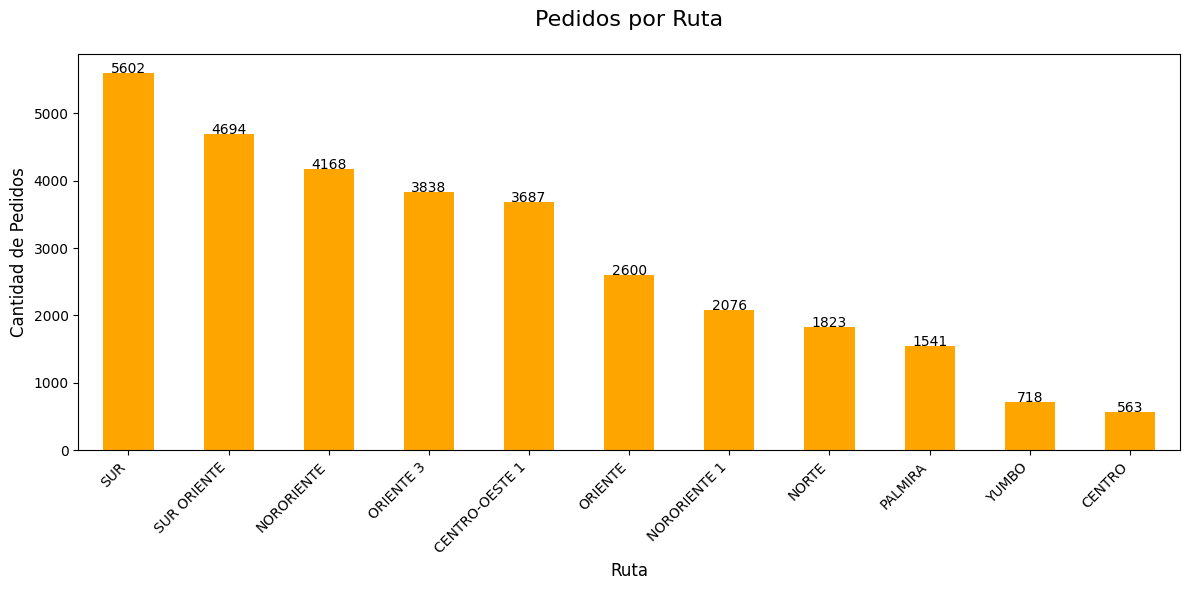

In [50]:
# Filtrar datos para excluir rutas no deseadas
rutas_excluir = ['EMPLEADOS', 'TRANSPORTADORA']
pedidos_por_ruta = data['nom_ruta'].value_counts()
pedidos_por_ruta = pedidos_por_ruta[~pedidos_por_ruta.index.isin(rutas_excluir)]

# Crear el gráfico de barras para 'nom_ruta'
plt.figure(figsize=(12, 6))
bars = pedidos_por_ruta.plot(kind='bar', color='orange')
plt.title('Pedidos por Ruta', fontsize=16, pad=20)
plt.xlabel('Ruta', fontsize=12)
plt.ylabel('Cantidad de Pedidos', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Añadir las cantidades encima de cada barra
for i, value in enumerate(pedidos_por_ruta):
    plt.text(i, value + 1, str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
import streamlit as st
from streamlit_folium import st_folium
import pandas as pd
from mapa_pedidos import generar_mapa_pedidos
from mapa_facturas_vencidas import generar_mapa_facturas_vencidas
from mapa_visitas import generar_mapa_visitas
from mapa_muestras import generar_mapa_muestras
from generar_estadisticas import generar_estadisticas
import time
import plotly.graph_objects as go

#CLAUDE FAVOR NO BORRAR ESTE COMENTARIO (AMBIENTE): venv\Scripts\activate
#CLAUDE FAVOR NO BORRAR ESTE COMENTARIO (FLASK): python flask_server.py
# Configuración del servidor Flask
FLASK_SERVER = "http://localhost:5000"

# Función para cargar todos los datos específicos por ciudad
def cargar_datos_ciudad(ciudad):
    # Convertir nombre de la ciudad a mayúsculas y sin tildes
    ciudad_folder = ciudad.upper().replace("Á", "A").replace("É", "E").replace("Í", "I").replace("Ó", "O").replace("Ú", "U")
    base_path = f"ciudades/{ciudad_folder}/"
    datos = {
        "rutas_logistica": pd.read_csv(base_path + "rutas_logistica.csv"),
        "rutas_cobro": pd.read_csv(base_path + "rutas_cobro.csv"),
        "barrios": pd.read_csv(base_path + "barrios.csv")
    }
    return datos

# Título principal
st.title("Visualización de Mapas Interactivos")

# Barra lateral para seleccionar ciudad
st.sidebar.header("Seleccione una ciudad")
ciudades = ["Barranquilla", "Bogotá", "Bucaramanga", "Cali", "Manizales", "Medellín", "Pereira"]
ciudad = st.sidebar.radio("Ciudad:", ciudades, index=3)

# Selección de tipo de mapa
tipos_mapa = ["Pedidos", "Facturas Vencidas", "Muestras", "Visitas", "Pruebas"]
st.header("Seleccione el tipo de mapa")
tipo_mapa = st.selectbox("Tipo de Mapa:", tipos_mapa)

# Cargar datos específicos según la ciudad
datos_ciudad = cargar_datos_ciudad(ciudad)

# Formulario dinámico para filtros
st.subheader("Aplicar Filtros")
with st.form(key="filtros_form"):
    col1, col2 = st.columns(2)
    with col1:
        if tipo_mapa == "Pedidos":
            rutas_disponibles = datos_ciudad["rutas_logistica"]["nombre_ruta"].sort_values().unique()
            ruta = st.selectbox("Seleccione una ruta logística (opcional):", options=[""] + list(rutas_disponibles))
            fecha_inicio = st.date_input("Fecha de Inicio")
            fecha_fin = st.date_input("Fecha de Fin")
        elif tipo_mapa == "Facturas Vencidas":
            edad_min = st.number_input("Edad mínima (días):", min_value=0, value=91)
            edad_max = st.number_input("Edad máxima (días):", min_value=0, value=120)
            rutas_cobro_disponibles = datos_ciudad["rutas_cobro"]["ruta"].sort_values().unique()
            ruta_cobro = st.selectbox("Seleccione una ruta de cobro (opcional):", options=[""] + list(rutas_cobro_disponibles))
        elif tipo_mapa == "Muestras":
            barrios_disponibles = datos_ciudad["barrios"]["barrio"].sort_values().unique()
            barrios = st.multiselect("Seleccione los barrios:", options=barrios_disponibles, default=[])
            fecha_inicio = st.date_input("Fecha de Inicio")
            fecha_fin = st.date_input("Fecha de Fin")
        elif tipo_mapa == "Visitas":
            rutas_cobro_disponibles = datos_ciudad["rutas_cobro"]["ruta"].sort_values().unique()
            ruta_cobro = st.selectbox("Seleccione una ruta de cobro (opcional):", options=[""] + list(rutas_cobro_disponibles))
            agrupacion = st.radio("Tipo de agrupación:", ["Agrupado", "No agrupado"], index=0)
            fecha_inicio = st.date_input("Fecha de Inicio")
            fecha_fin = st.date_input("Fecha de Fin")

    with col2:
        submit_button = st.form_submit_button(label="Generar Mapa")
        mostrar_estadisticas = st.form_submit_button(label="Generar Estadísticas")

# Sección para mostrar el mapa y las estadísticas
if submit_button or mostrar_estadisticas:
    try:
        # Contenedor para el mapa y las estadísticas
        col_mapa, col_stats = st.columns([2, 1])
        
        with col_mapa:
            if submit_button:
                if tipo_mapa == "Pedidos":
                    filename = generar_mapa_pedidos(fecha_inicio, fecha_fin, ciudad, ruta)
                    map_type = "pedidos"
                elif tipo_mapa == "Visitas":
                    filename = generar_mapa_visitas(fecha_inicio, fecha_fin, agrupacion, ciudad, ruta_cobro)
                    map_type = "visitas"
                elif tipo_mapa == "Facturas Vencidas":
                    filename = generar_mapa_facturas_vencidas(ciudad, edad_min, edad_max, ruta_cobro)
                    map_type = "facturas"
                elif tipo_mapa == "Muestras":
                    filename = generar_mapa_muestras(fecha_inicio, fecha_fin, ciudad, barrios)
                    map_type = "muestras"

                # Crear el enlace al mapa en el servidor Flask
                map_url = f"{FLASK_SERVER}/maps/mapa_{map_type}.html"
                timestamp = int(time.time())
                map_url_with_cache = f"{map_url}?v={timestamp}"

                st.markdown(f"""
                    <div style='text-align: center; margin: 20px 0;'>
                        <a href='{map_url_with_cache}' target='_blank' 
                           style='background-color: #0066cc; color: white; 
                                  padding: 10px 20px; text-decoration: none; 
                                  border-radius: 5px;'>
                            Ver Mapa en Nueva Pestaña
                        </a>
                    </div>
                """, unsafe_allow_html=True)

        # Generar y mostrar estadísticas
        with col_stats:
            if mostrar_estadisticas:
                st.subheader("Estadísticas")
                
                # Llamar a la función de estadísticas con los parámetros correspondientes
                graficos = generar_estadisticas(
                    tipo_mapa=tipo_mapa,
                    ciudad=ciudad,
                    fecha_inicio=fecha_inicio if 'fecha_inicio' in locals() else None,
                    fecha_fin=fecha_fin if 'fecha_fin' in locals() else None,
                    ruta=ruta if 'ruta' in locals() else None,
                    ruta_cobro=ruta_cobro if 'ruta_cobro' in locals() else None,
                    barrios=barrios if 'barrios' in locals() else None,
                    edad_min=edad_min if 'edad_min' in locals() else None,
                    edad_max=edad_max if 'edad_max' in locals() else None,
                    agrupacion=agrupacion if 'agrupacion' in locals() else None
                )
                
                # Mostrar las gráficas
                if graficos:
                    for titulo, figura in graficos.items():
                        with st.expander(titulo, expanded=True):
                            st.plotly_chart(figura, use_container_width=True)
                else:
                    st.warning("No hay datos disponibles para generar estadísticas")

    except Exception as e:
        st.error(f"Error al generar el contenido: {str(e)}")

In [5]:
rutas_coordenadas = {
        'CALI': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_CALI.csv",
        'MEDELLIN': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_MEDELLIN.csv",
        'MANIZALES': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_MANIZALES.csv",
        'PEREIRA': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_PEREIRA.csv",
        'BOGOTA': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_BOGOTA.csv",
        'BARRANQUILLA': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_BARRANQUILLA.csv",
        'BUCARAMANGA': "data/BARRIOS_COORDENADAS_RUTAS_COMPLETO_BUCARAMANGA.csv"
    }
centroope = 2
fecha_inicio = "2024-05-01" 
fecha_fin = "2024-12-01"
ruta_coordenadas = rutas_coordenadas['CALI']
data = crear_df_muestras(centroope, fecha_inicio, fecha_fin, ruta_coordenadas)
data.columns

c:\Users\hp\OneDrive - GRUPO EMPRESARIAL DE LA LIMPIEZA SA\Documentos\GitHub\MAPAS_STREAMLIT\pre_procesamiento\preprocesamiento_muestras.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion)


         fecha_evento coordenada_longitud  ... ruta_cobro  nom_ruta
0 2024-05-02 14:32:10         -76.5290885  ...         10       SUR
1 2024-05-02 14:41:24  -76.52913666666667  ...         10       SUR
2 2024-05-02 14:41:58  -76.52911166666667  ...         10       SUR
3 2024-05-02 15:13:24  -76.52942333333334  ...         10       SUR
4 2024-05-02 15:17:43  -76.53174166666666  ...         10       SUR

[5 rows x 10 columns]


Index(['fecha_evento', 'coordenada_longitud', 'coordenada_latitud',
       'id_barrio', 'barrio', 'id_estrato', 'latitud', 'longitud',
       'ruta_cobro', 'nom_ruta'],
      dtype='object')